In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''
在上一个 notebook中已经处理了所有缺失值
'''
data = pd.read_csv("./new_data.csv")
data_wages = data['Wage']
data = data.drop(columns=data.columns[[0, 4]])
data.shape

(18207, 48)

In [3]:
data.head(5).T

,0,1,2,3,4
Age,31.0,33.0,26.0,27.0,27.0
Overall,94.0,94.0,92.0,91.0,91.0
Potential,94.0,94.0,93.0,93.0,92.0
Special,2202.0,2228.0,2143.0,1471.0,2281.0
Preferred Foot,0.0,1.0,1.0,1.0,1.0
International Reputation,5.0,5.0,5.0,4.0,4.0
Weak Foot,4.0,4.0,5.0,3.0,5.0
Skill Moves,4.0,5.0,5.0,1.0,4.0
Work Rate,4.0,4.0,5.0,4.0,6.0
Body Type,5.0,5.0,5.0,2.0,1.0


1.Overall评价模型
=

偏度:0.06718492227833812
峰度:0.09656866702634614


<AxesSubplot:xlabel='Overall'>

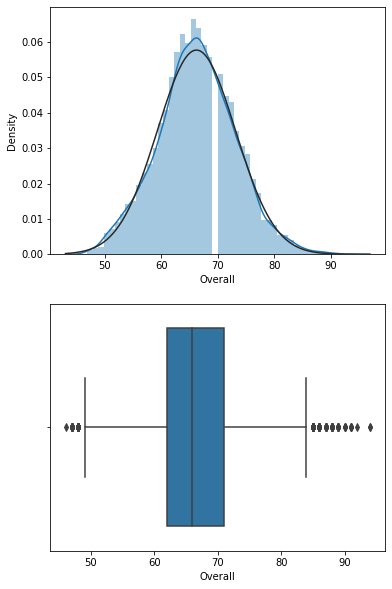

In [4]:
from scipy import stats

print("偏度:{}".format(data['Overall'].skew()))
print("峰度:{}".format(data['Overall'].kurt()))

f, ax = plt.subplots(2, 1, figsize=(6, 10))

sns.distplot(data['Overall'], ax=ax[0], fit=stats.norm)
sns.boxplot(data['Overall'])

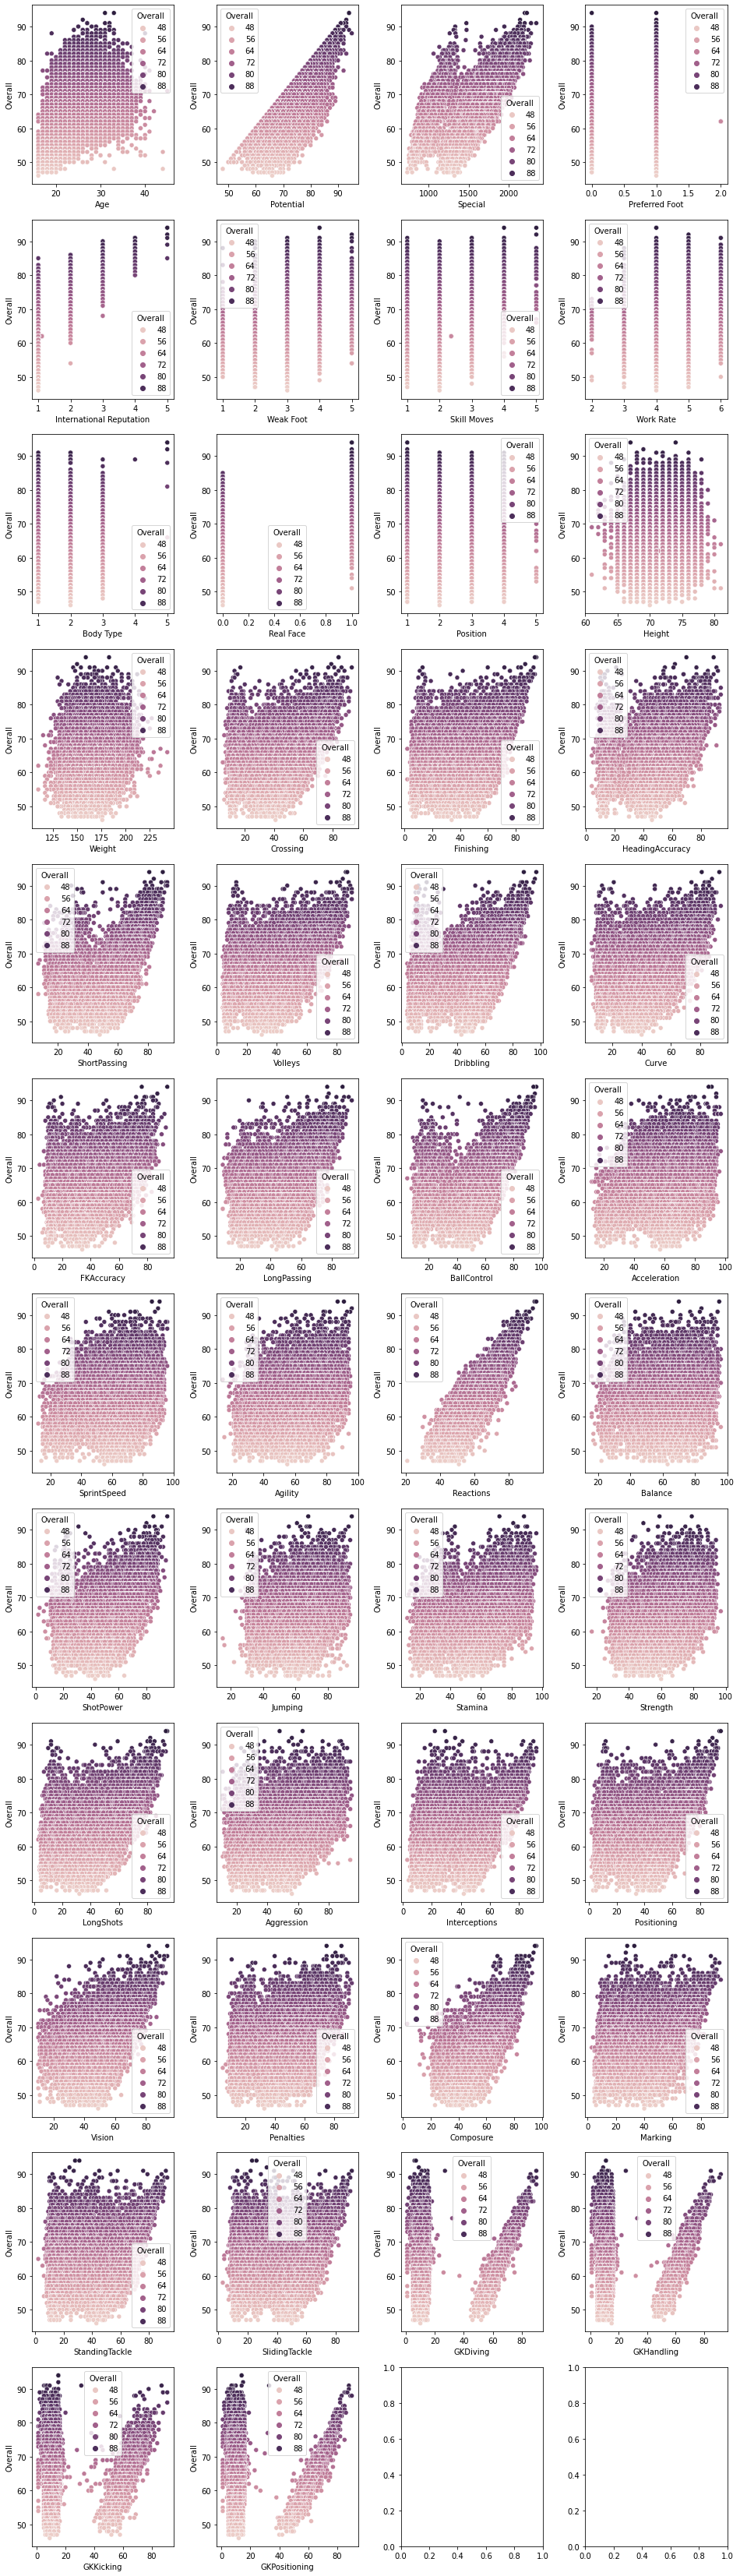

In [5]:
colNames = data.columns.tolist()

fig, ax = plt.subplots(12, 4, figsize=(16, 60))
plt.subplots_adjust(wspace=0.3, hspace=0.2)
r, c = 0, 0
for i in range(47):
    if colNames[i] != "Overall":
        sns.scatterplot(data[colNames[i]], data['Overall'],
                        hue=data['Overall'], ax=ax[r, c])
        if c == 3:
            c = 0
            r += 1
        else:
            c += 1

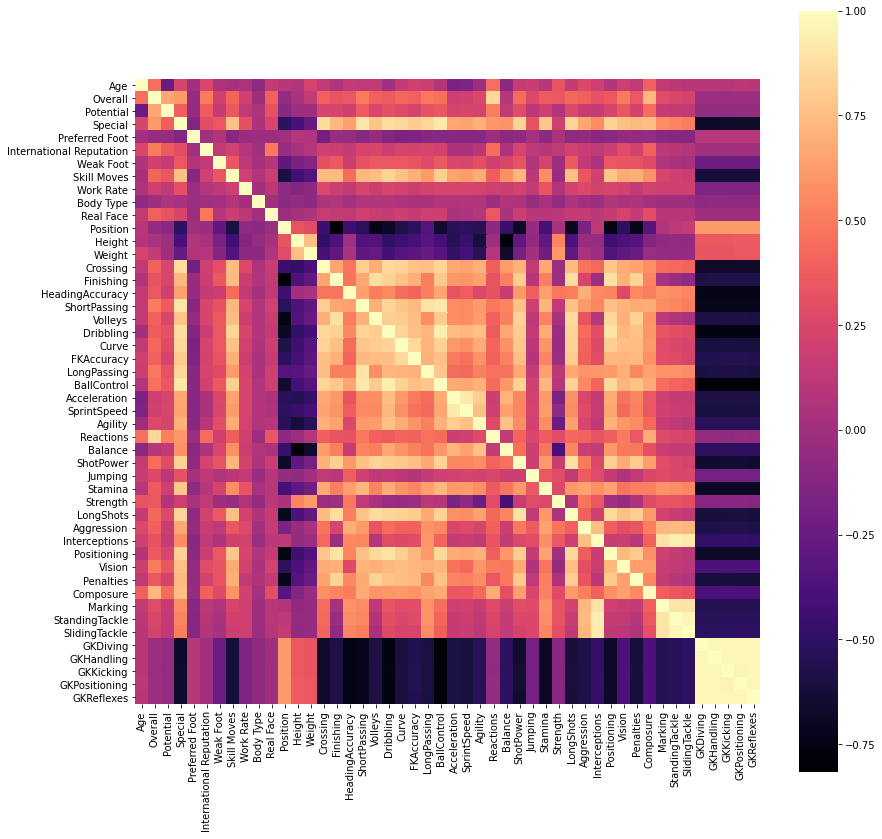

In [6]:
def draw_corr(data):
    corr = data.corr()
    fig = plt.figure(figsize=(14, 14))
    sns.heatmap(corr, cmap="magma", vmax=1, square=True)
    plt.show()


draw_corr(data)

<AxesSubplot:>

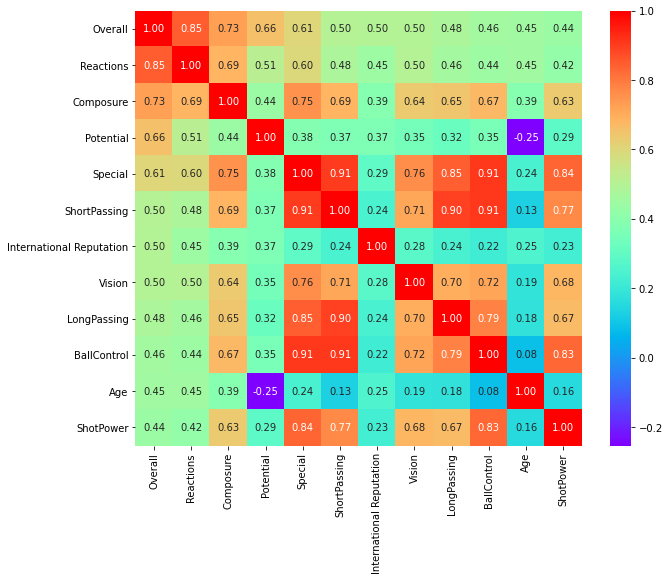

In [7]:
corrMat = data.corr()
fig = plt.figure(figsize=(10, 8))
k = 12
cols = corrMat.nlargest(k, 'Overall')['Overall'].index
corr = np.corrcoef(data[cols].values.T)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="rainbow",
            yticklabels=cols.values, xticklabels=cols.values)

In [8]:
# fig, ax = plt.subplots(12, 4, figsize=(16, 60))
# plt.subplots_adjust(wspace=0.3, hspace=0.2)
# r, c = 0, 0
# for i in range(47):
#     if colNames[i] != "Overall":
#         sns.distplot(data[colNames[i]], fit=stats.norm, ax=ax[r, c])
#         if c == 3:
#             c = 0
#             r += 1
#         else:
#             c += 1

In [9]:
featuresName = data.columns.tolist()

skews = data[featuresName].apply(lambda x: stats.skew(
    x.dropna())).sort_values(ascending=False)
skews = pd.DataFrame({'Skew': skews})
skews[skews['Skew'].abs() > 0.75].T

,International Reputation,Real Face,GKPositioning,GKReflexes,GKDiving,GKHandling,GKKicking,Body Type,Acceleration,SprintSpeed,HeadingAccuracy,Stamina,Dribbling,ShortPassing,Preferred Foot,BallControl
Skew,4.065447,2.847417,2.46685,2.455675,2.444037,2.436507,2.433585,0.946925,-0.816311,-0.829612,-0.886224,-0.916533,-1.085542,-1.101678,-1.189689,-1.269433


In [10]:
# boxcox 要求值必须为正数
skewCols = list(skews[skews["Skew"].abs() > 1].index)
for col in skewCols:
    if 0 in data[col].unique():
        print(f"{col}:\n{data[col].unique()}\n")

Real Face:
[1. 0.]

Preferred Foot:
[0. 1. 2.]



In [11]:
skewCols = ['ShortPassing', 'BallControl', 'GKKicking', 'GKHandling',
            'GKPositioning', 'GKDiving', 'GKReflexes', 'Dribbling']

for col in skewCols:
    data[col], lam = stats.boxcox(data[col])

skews = data[skewCols].apply(lambda x: stats.skew(
    x.dropna())).sort_values(ascending=False)
skews = pd.DataFrame({'Skew': skews})
skews

,Skew
ShortPassing,-0.223195
BallControl,-0.332118
GKKicking,-0.354046
GKHandling,-0.363572
GKPositioning,-0.368351
GKDiving,-0.373605
GKReflexes,-0.379326
Dribbling,-0.431774


In [12]:
'''
划分数据集
'''

data_overall = data.Overall.values
data.drop(['Overall'], axis=1, inplace=True)
data_overall.shape, data.shape

((18207,), (18207, 47))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data_overall, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14565, 47), (3642, 47), (14565,), (3642,))

In [14]:
'''
特征归一化
'''
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
'''
特征选择
'''
from sklearn.linear_model import Lasso
lassoModel = Lasso(alpha=0.001)
lassoModel.fit(X_train, y_train)

impt = pd.DataFrame({"Feature Importance": lassoModel.coef_}, index=data.columns)
impt.sort_values("Feature Importance", ascending=False).round(5).head(10)

,Feature Importance
Special,10.46175
Potential,3.98679
Age,3.51161
Reactions,1.46825
BallControl,0.92505
Composure,0.61285
Skill Moves,0.59753
Position,0.55062
ShortPassing,0.46380
Real Face,0.32890


(47, 1)

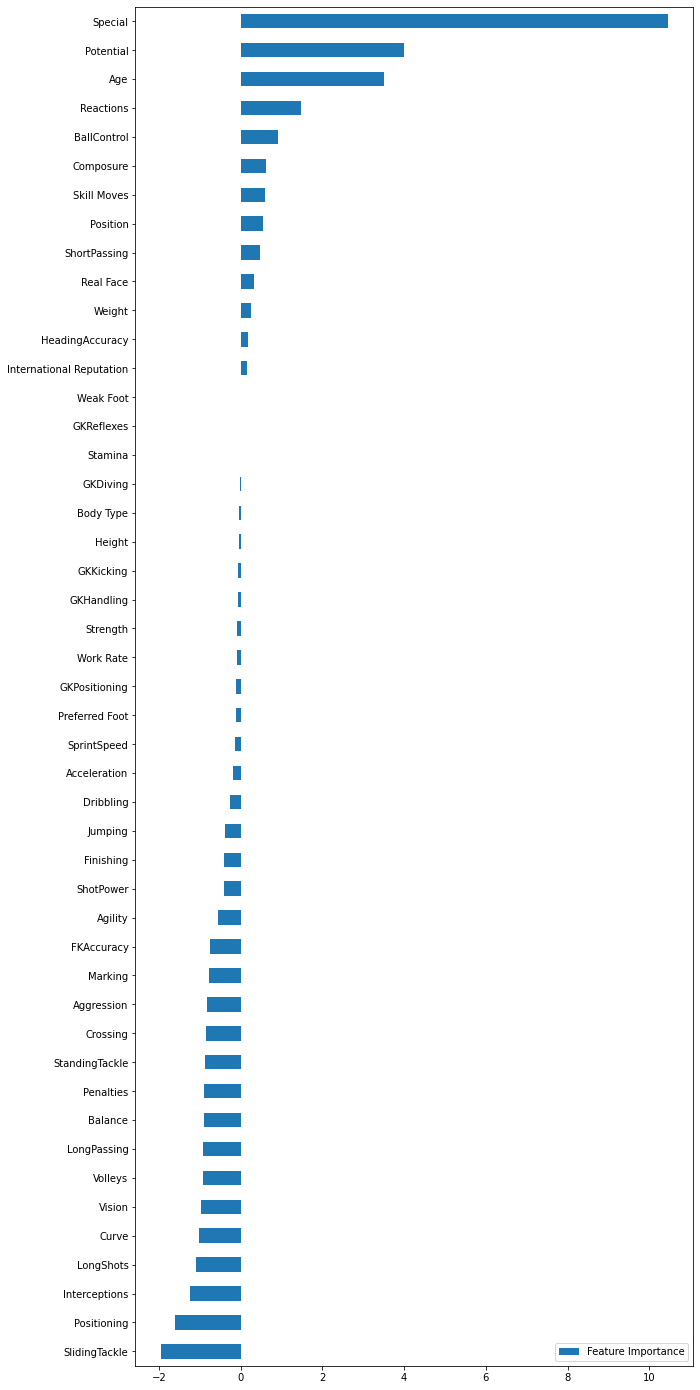

In [16]:
impt = impt[impt["Feature Importance"] != 0].sort_values("Feature Importance")
impt.plot(kind="barh", figsize=(10, 25))
display(impt.shape)

In [17]:
chooseFeatures = impt.index.to_list()
chooseData = data[chooseFeatures].copy()
chooseData.shape

(18207, 47)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(chooseData, data_overall, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14565, 47), (3642, 47), (14565,), (3642,))

In [19]:
'''
评价函数
'''
from sklearn.metrics import mean_squared_error


def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [20]:
# PCA的效果不如不PCA
# from sklearn.decomposition import PCA

# pcaModel = PCA(n_components=40)
# X_train = pcaModel.fit_transform(X_train)
# X_test = pcaModel.fit_transform(X_test)

In [21]:
'''
网格搜索
'''


def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(
        model, params, scoring="neg_mean_squared_error", cv=5, n_jobs=-1, error_score=0.)
    grid.fit(X, y)
    print("Best Score:{}".format(np.sqrt(-grid.best_score_)))
    print("Best Parameters: {}".format(grid.best_params_))
    grid.cv_results_[
        'mean_test_score'] = np.sqrt(-grid.cv_results_['mean_test_score'])
    print(pd.DataFrame(grid.cv_results_)[
          ['params', 'mean_test_score', 'std_test_score']])
    return grid

In [22]:
'''
Model1. Lasso
'''


from sklearn.model_selection import GridSearchCV

param_Lasso = {'alpha': [0.0004, 0.0005, 0.0006],
               'max_iter': [10000], 'random_state': [1]}
Lasso_grid = get_best_model_and_accuracy(
    Lasso(), param_Lasso, X_train, y_train)

Best Score:1.8437748903354507
Best Parameters: {'alpha': 0.0006, 'max_iter': 10000, 'random_state': 1}
                                              params  mean_test_score  \
0  {'alpha': 0.0004, 'max_iter': 10000, 'random_s...         1.843792   
1  {'alpha': 0.0005, 'max_iter': 10000, 'random_s...         1.843783   
2  {'alpha': 0.0006, 'max_iter': 10000, 'random_s...         1.843775   

   std_test_score  
0        0.057581  
1        0.057636  
2        0.057691  


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lassoModel = Lasso(alpha=0.0004, max_iter=10000, random_state=1)
lassoModel.fit(X_train, y_train)
pred1 = lassoModel.predict(X_test)
print(f"rmse : {rmse(y_test,pred1)}")
print(f"r2 : {r2_score(y_test,pred1)}")

rmse : 1.8573028100229458
r2 : 0.9267284946318339


In [24]:
'''
Model2. LinearRegression
'''

linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
pred2 = linearModel.predict(X_test)
print(f"rmse : {rmse(y_test,pred2)}")
print(f"r2 : {r2_score(y_test,pred2)}")

rmse : 1.857213774106628
r2 : 0.9267355194844487


In [25]:
'''
Model3. XGB
'''

from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred3 = xgb.predict(X_test)
print(f"rmse : {rmse(y_test,pred3)}")
print(f"r2 : {r2_score(y_test,pred3)}")

rmse : 0.9664386374846767
r2 : 0.9801610697095714


In [26]:
'''
Model4. LGBM
'''

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
pred4 = lgbm.predict(X_test)
print(f"rmse : {rmse(y_test,pred4)}")
print(f"r2 : {r2_score(y_test,pred4)}")

rmse : 0.9168674471846195
r2 : 0.982144057040049


In [27]:
'''
Model5. RandomForestRegressor
'''

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred5 = rfr.predict(X_test)
print(f"rmse : {rmse(y_test,pred5)}")
print(f"r2 : {r2_score(y_test,pred5)}")

rmse : 1.039098160075014
r2 : 0.9770658401985062


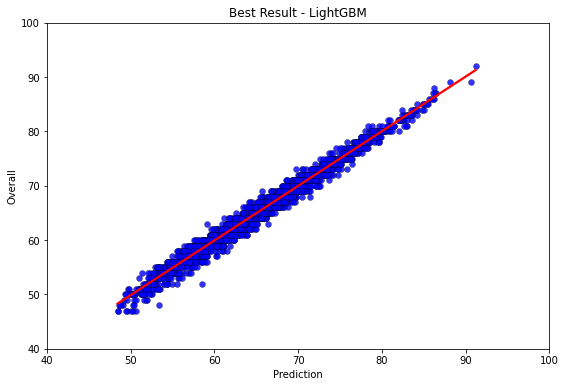

In [28]:
fig = plt.figure(figsize=(9,6))
sns.regplot(pred4,y_test,scatter_kws={'color':'blue','linewidth':0.3,'edgecolor':'black'},line_kws={'color':'red'})
plt.xlabel("Prediction")
plt.ylabel("Overall")
plt.title("Best Result - LightGBM")
plt.xlim(40,100)
plt.ylim(40,100)
plt.show()

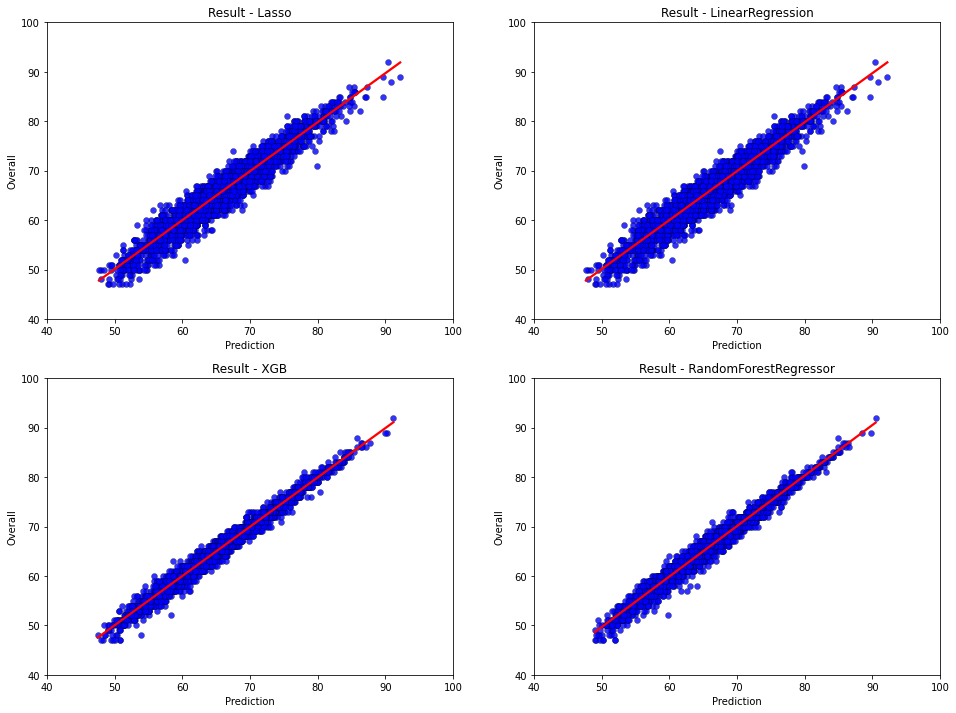

In [29]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
plt.subplots_adjust(hspace=0.2,wspace=0.2)

res = [pred1, pred2, pred3, pred5]
titles = ['Lasso', 'LinearRegression', 'XGB', 'RandomForestRegressor']

r, c = 0, 0
for i in range(4):
    sns.regplot(res[i],y_test,scatter_kws={'color':'blue','linewidth':0.3,'edgecolor':'black'},line_kws={'color':'red'},ax=ax[r,c])
    ax[r,c].set_xlabel("Prediction")
    ax[r,c].set_ylabel("Overall")
    ax[r,c].set_title("Result - "+titles[i])
    ax[r,c].set_xlim(40,100)
    ax[r,c].set_ylim(40,100)
    if c == 1:
        c = 0
        r += 1
    else:c += 1
plt.show()

In [30]:
scores = {'Lasso':r2_score(y_test,pred1),'Linear':r2_score(y_test,pred2),'XGB':r2_score(y_test,pred3),'LGBM':r2_score(y_test,pred4),'RandomForest':r2_score(y_test,pred5)}
scores

{'Lasso': 0.9267284946318339,
 'Linear': 0.9267355194844487,
 'XGB': 0.9801610697095714,
 'LGBM': 0.982144057040049,
 'RandomForest': 0.9770658401985062}

2.Wage模型
=

In [31]:
data['Overall'] = data_overall
data['Wage'] = data_wages
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Potential                 18207 non-null  int64  
 2   Special                   18207 non-null  int64  
 3   Preferred Foot            18207 non-null  float64
 4   International Reputation  18207 non-null  float64
 5   Weak Foot                 18207 non-null  float64
 6   Skill Moves               18207 non-null  float64
 7   Work Rate                 18207 non-null  float64
 8   Body Type                 18207 non-null  float64
 9   Real Face                 18207 non-null  float64
 10  Position                  18207 non-null  float64
 11  Height                    18207 non-null  float64
 12  Weight                    18207 non-null  float64
 13  Crossing                  18207 non-null  float64
 14  Finish

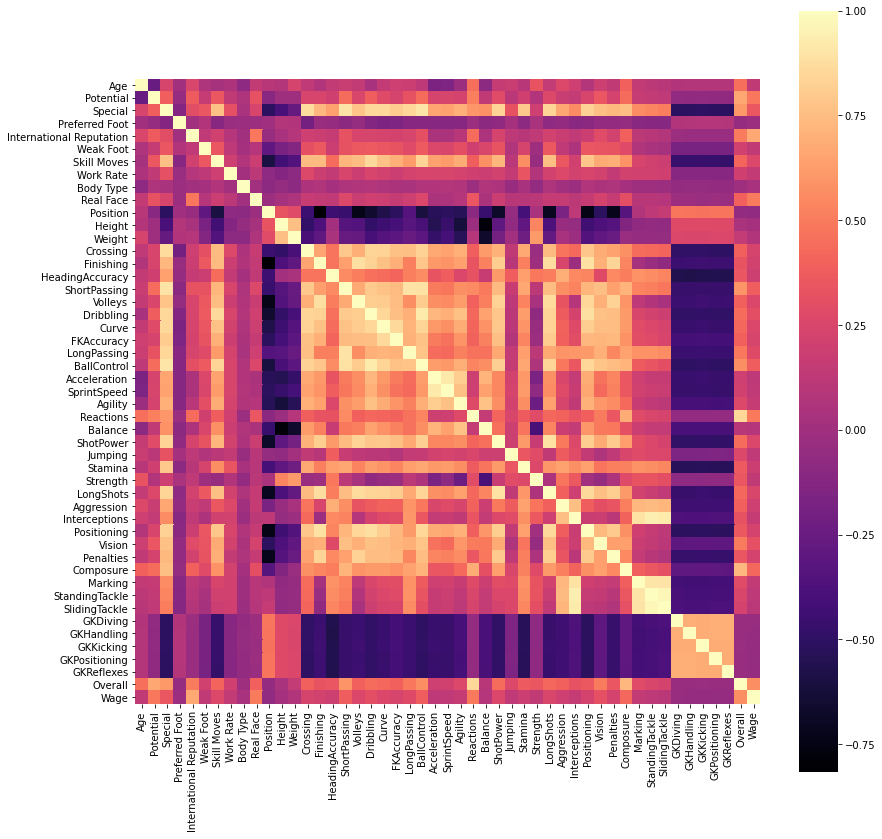

In [32]:
draw_corr(data)

<AxesSubplot:>

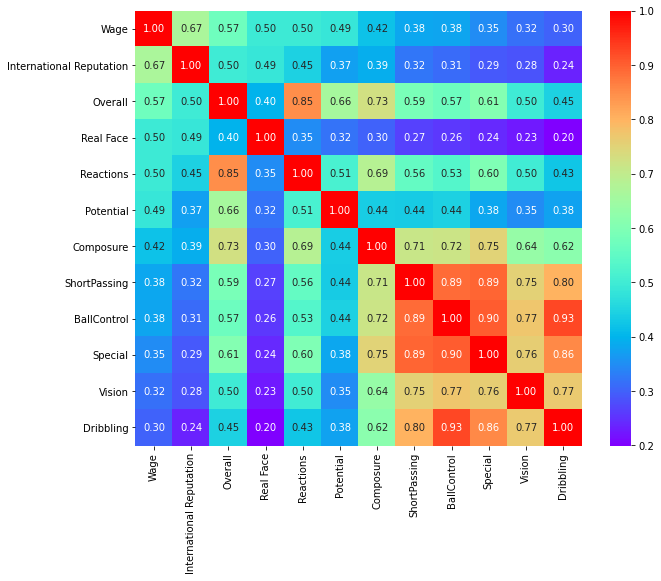

In [33]:
corrMat = data.corr()
fig = plt.figure(figsize=(10, 8))
k = 12
cols = corrMat.nlargest(k, 'Wage')['Wage'].index
corr = np.corrcoef(data[cols].values.T)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="rainbow",
            yticklabels=cols.values, xticklabels=cols.values)

偏度:0.06718492227833812
峰度:0.09656866702634614


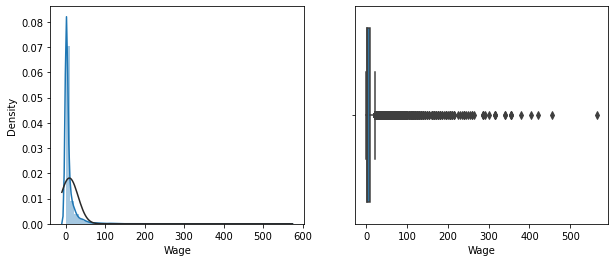

In [34]:
print("偏度:{}".format(data['Overall'].skew()))
print("峰度:{}".format(data['Overall'].kurt()))

f, ax = plt.subplots(1, 2,figsize=(10,4))

sns.distplot(data['Wage'], ax=ax[0], fit=stats.norm)
sns.boxplot(data['Wage'])
plt.show()

In [35]:
new_data = data[data['Wage']>0]
new_data.shape

(17966, 49)

偏度:0.06718492227833812
峰度:0.09656866702634614


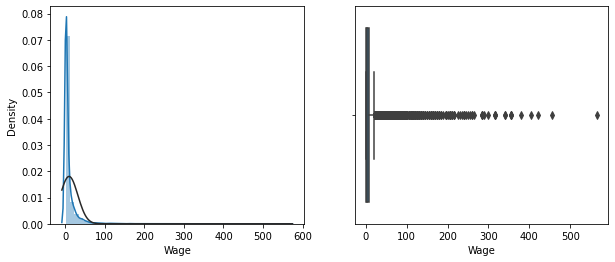

In [36]:
print("偏度:{}".format(data['Overall'].skew()))
print("峰度:{}".format(data['Overall'].kurt()))

f, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.distplot(new_data['Wage'], ax=ax[0], fit=stats.norm)
sns.boxplot(new_data['Wage'])
plt.show()

In [37]:
'''
划分数据集
'''

data_wages = data.Wage.values
data.drop(['Wage'], axis=1, inplace=True)
data_wages.shape, data.shape

((18207,), (18207, 48))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, data_wages, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14565, 48), (3642, 48), (14565,), (3642,))

In [39]:
'''
特征选择
'''
lassoModel = Lasso(alpha=0.001)
lassoModel.fit(X_train, y_train)

impt = pd.DataFrame({"Feature Importance": lassoModel.coef_}, index=data.columns)
impt.sort_values("Feature Importance", ascending=False).round(5).head(10)

,Feature Importance
International Reputation,24.94573
Real Face,11.38842
GKDiving,2.42600
GKHandling,1.92683
GKReflexes,1.68249
Overall,1.13568
Work Rate,0.98791
Body Type,0.57138
GKKicking,0.38445
Position,0.29600


(48, 1)

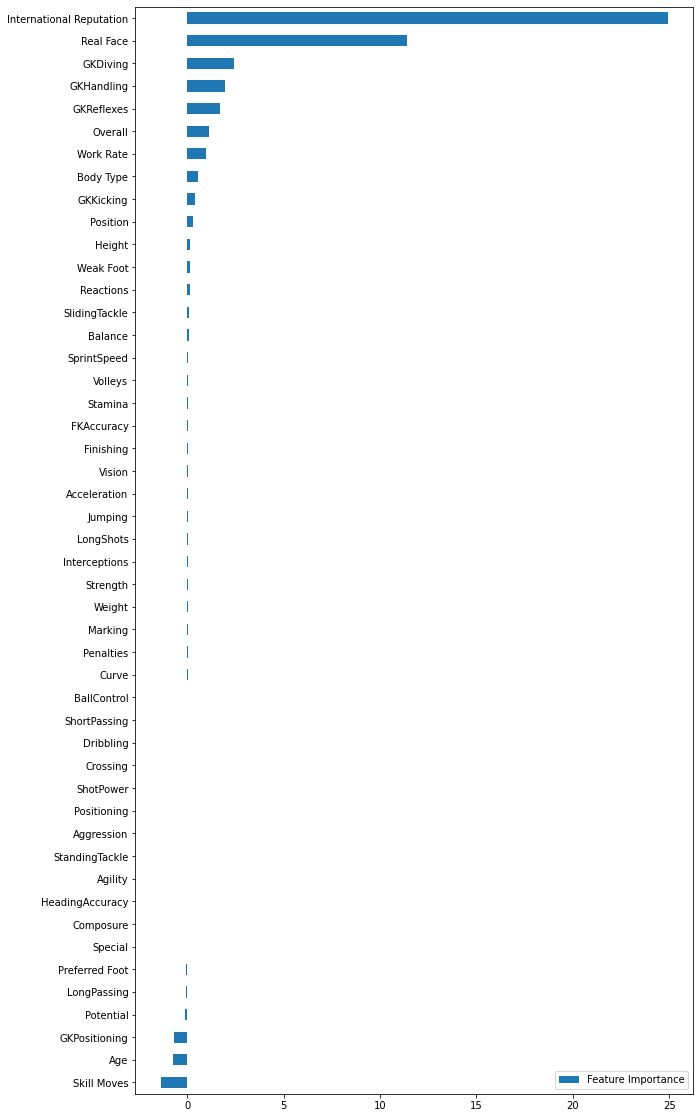

In [40]:
impt = impt[impt["Feature Importance"] != 0].sort_values("Feature Importance")
impt.plot(kind="barh", figsize=(10, 20))
display(impt.shape)

In [41]:
chooseFeatures = impt.index.to_list()
chooseData = data[chooseFeatures].copy()
chooseData.shape

(18207, 48)

In [42]:
'''
1.Lasso
'''


param_Lasso = {'alpha': [0.0004, 0.0005, 0.0006],
               'max_iter': [10000], 'random_state': [1]}
Lasso_grid = get_best_model_and_accuracy(
    Lasso(), param_Lasso, X_train, y_train)

Best Score:14.692806834048508
Best Parameters: {'alpha': 0.0006, 'max_iter': 10000, 'random_state': 1}
                                              params  mean_test_score  \
0  {'alpha': 0.0004, 'max_iter': 10000, 'random_s...        14.692857   
1  {'alpha': 0.0005, 'max_iter': 10000, 'random_s...        14.692832   
2  {'alpha': 0.0006, 'max_iter': 10000, 'random_s...        14.692807   

   std_test_score  
0       74.197183  
1       74.199458  
2       74.201734  


In [43]:
lassoModel = Lasso(alpha=0.0006, max_iter=10000, random_state=1)
lassoModel.fit(X_train, y_train)
pred1 = lassoModel.predict(X_test)
print(f"rmse : {rmse(y_test,pred1)}")
print(f"r2 : {r2_score(y_test,pred1)}")

rmse : 14.025670158186633
r2 : 0.6092157101321091


In [44]:
'''
Model2. LinearRegression
'''

linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
pred2 = linearModel.predict(X_test)
print(f"rmse : {rmse(y_test,pred2)}")
print(f"r2 : {r2_score(y_test,pred2)}")

rmse : 14.025706910538315
r2 : 0.609213662135784


In [45]:
'''
Model3. XGB
'''


xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred3 = xgb.predict(X_test)
print(f"rmse : {rmse(y_test,pred3)}")
print(f"r2 : {r2_score(y_test,pred3)}")

rmse : 11.678043769136345
r2 : 0.7290868720618677


In [46]:
'''
Model4. LGBM
'''


lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
pred4 = lgbm.predict(X_test)
print(f"rmse : {rmse(y_test,pred4)}")
print(f"r2 : {r2_score(y_test,pred4)}")

rmse : 10.821052457395547
r2 : 0.7673897446216067


In [47]:
'''
Model5. RandomForestRegressor
'''


rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred5 = rfr.predict(X_test)
print(f"rmse : {rmse(y_test,pred5)}")
print(f"r2 : {r2_score(y_test,pred5)}")

rmse : 10.635696105080346
r2 : 0.775290365818379


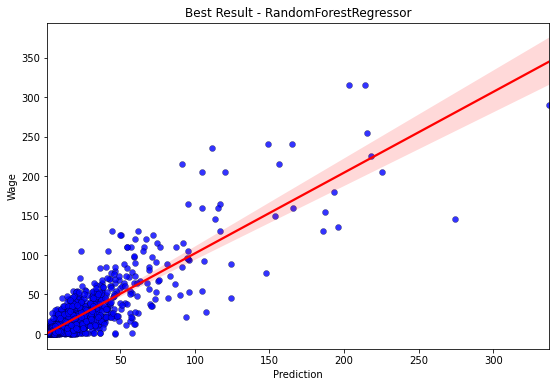

In [48]:
fig = plt.figure(figsize=(9,6))
sns.regplot(pred5,y_test,scatter_kws={'color':'blue','linewidth':0.3,'edgecolor':'black'},line_kws={'color':'red'})
plt.xlabel("Prediction")
plt.ylabel("Wage")
plt.title("Best Result - RandomForestRegressor")
plt.show()

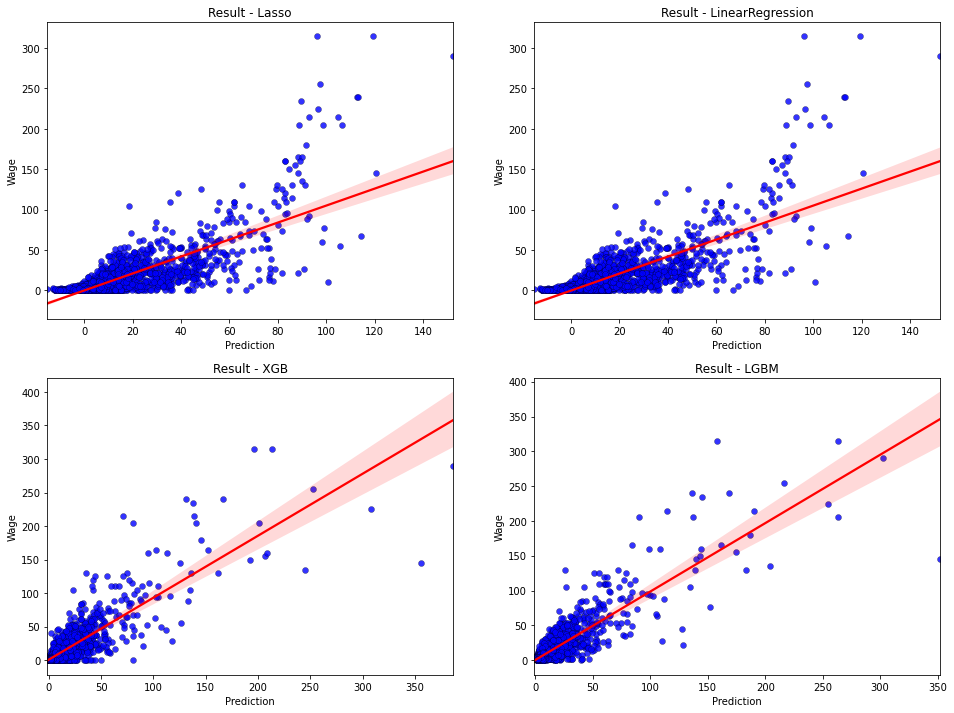

In [49]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
plt.subplots_adjust(hspace=0.2,wspace=0.2)

res = [pred1, pred2, pred3, pred4]
titles = ['Lasso', 'LinearRegression', 'XGB', 'LGBM']

r, c = 0, 0
for i in range(4):
    sns.regplot(res[i],y_test,scatter_kws={'color':'blue','linewidth':0.3,'edgecolor':'black'},line_kws={'color':'red'},ax=ax[r,c])
    ax[r,c].set_xlabel("Prediction")
    ax[r,c].set_ylabel("Wage")
    ax[r,c].set_title("Result - "+titles[i])
    if c == 1:
        c = 0
        r += 1
    else:c += 1
plt.show()

In [50]:
scores = {'Lasso':r2_score(y_test,pred1),'Linear':r2_score(y_test,pred2),'XGB':r2_score(y_test,pred3),'LGBM':r2_score(y_test,pred4),'RandomForest':r2_score(y_test,pred5)}
scores

{'Lasso': 0.6092157101321091,
 'Linear': 0.609213662135784,
 'XGB': 0.7290868720618677,
 'LGBM': 0.7673897446216067,
 'RandomForest': 0.775290365818379}

3.去除某些离群值重新测试（国际巨星工资较高）
=

<AxesSubplot:xlabel='Wage'>

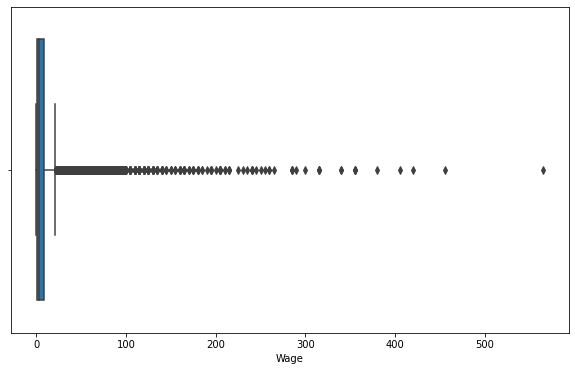

In [51]:
data['Wage'] = data_wages
fig = plt.figure(figsize=(10,6))
sns.boxplot(data['Wage'])

<AxesSubplot:xlabel='Wage'>

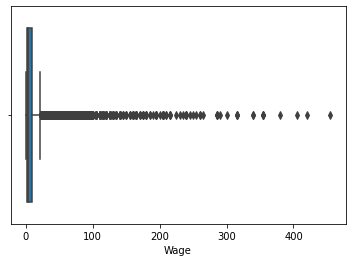

In [52]:
'''
范围设置在370,350时，模型结果都变差
'''

data = data.drop(data[data['Wage']>500].index)
sns.boxplot(data['Wage'])

In [53]:
data.reset_index(drop=True,inplace=True)

In [54]:
'''
划分数据集
'''

data_wages = data.Wage.values
data.drop(['Wage'], axis=1, inplace=True)
data_wages.shape, data.shape

((18206,), (18206, 48))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, data_wages, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14564, 48), (3642, 48), (14564,), (3642,))

In [56]:
'''
特征选择
'''
lassoModel = Lasso(alpha=0.001)
lassoModel.fit(X_train, y_train)

impt = pd.DataFrame({"Feature Importance": lassoModel.coef_}, index=data.columns)
impt.sort_values("Feature Importance", ascending=False).round(5).head(10)

,Feature Importance
International Reputation,24.23566
Real Face,12.15554
GKDiving,1.89616
GKReflexes,1.51388
Overall,1.17995
GKHandling,1.00324
Work Rate,0.99847
Body Type,0.48934
GKKicking,0.34036
Height,0.24172


(48, 1)

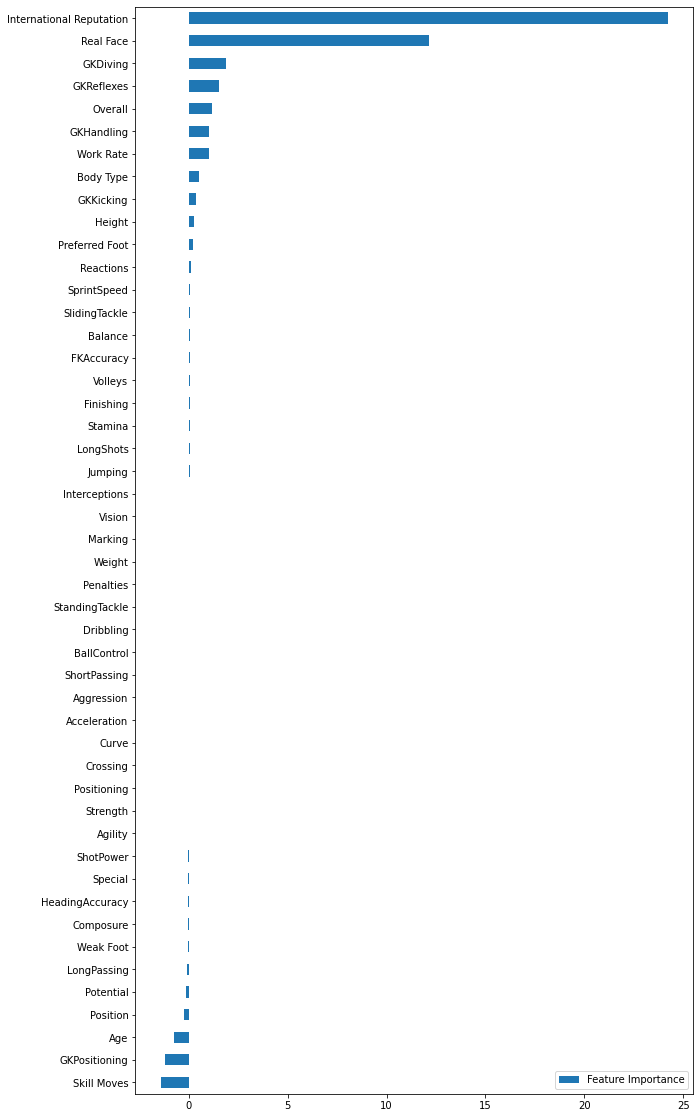

In [57]:
impt = impt[impt["Feature Importance"] != 0].sort_values("Feature Importance")
impt.plot(kind="barh", figsize=(10, 20))
display(impt.shape)

In [58]:
chooseFeatures = impt.index.to_list()
chooseData = data[chooseFeatures].copy()
chooseData.shape

(18206, 48)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(chooseData, data_wages, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14564, 48), (3642, 48), (14564,), (3642,))

In [60]:
'''
1.Lasso
'''

param_Lasso = {'alpha': [0.0004, 0.0005, 0.0006],
               'max_iter': [10000], 'random_state': [1]}
Lasso_grid = get_best_model_and_accuracy(
    Lasso(), param_Lasso, X_train, y_train)

Best Score:14.296229289769691
Best Parameters: {'alpha': 0.0006, 'max_iter': 10000, 'random_state': 1}
                                              params  mean_test_score  \
0  {'alpha': 0.0004, 'max_iter': 10000, 'random_s...        14.296312   
1  {'alpha': 0.0005, 'max_iter': 10000, 'random_s...        14.296270   
2  {'alpha': 0.0006, 'max_iter': 10000, 'random_s...        14.296229   

   std_test_score  
0       28.679117  
1       28.680285  
2       28.681452  


In [61]:
lassoModel = Lasso(alpha=0.0006, max_iter=10000, random_state=1)
lassoModel.fit(X_train, y_train)
pred1 = lassoModel.predict(X_test)
print(f"rmse : {rmse(y_test,pred1)}")
print(f"r2 : {r2_score(y_test,pred1)}")

rmse : 13.65907352249647
r2 : 0.585384365186535


In [62]:
'''
Model2. LinearRegression
'''

linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
pred2 = linearModel.predict(X_test)
print(f"rmse : {rmse(y_test,pred2)}")
print(f"r2 : {r2_score(y_test,pred2)}")

rmse : 13.65927306516157
r2 : 0.5853722510247736


In [63]:
'''
Model3. XGB
'''


xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred3 = xgb.predict(X_test)
print(f"rmse : {rmse(y_test,pred3)}")
print(f"r2 : {r2_score(y_test,pred3)}")

rmse : 9.690088426532647
r2 : 0.7913306467689012


In [64]:
'''
Model4. LGBM
'''


lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
pred4 = lgbm.predict(X_test)
print(f"rmse : {rmse(y_test,pred4)}")
print(f"r2 : {r2_score(y_test,pred4)}")

rmse : 10.065232317397601
r2 : 0.7748609670670876


In [65]:
'''
Model5. RandomForestRegressor
'''


rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred5 = rfr.predict(X_test)
print(f"rmse : {rmse(y_test,pred5)}")
print(f"r2 : {r2_score(y_test,pred5)}")

rmse : 9.570355196811754
r2 : 0.7964555323409566


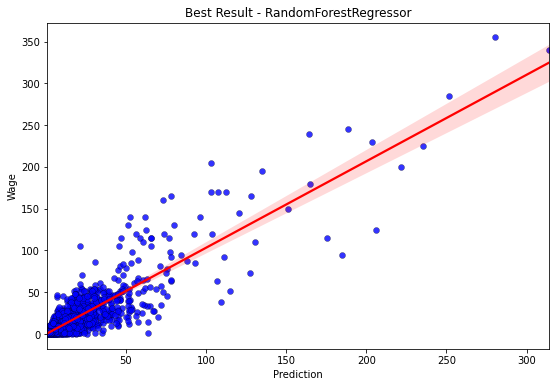

In [66]:
fig = plt.figure(figsize=(9,6))
sns.regplot(pred5,y_test,scatter_kws={'color':'blue','linewidth':0.3,'edgecolor':'black'},line_kws={'color':'red'})
plt.xlabel("Prediction")
plt.ylabel("Wage")
plt.title("Best Result - RandomForestRegressor")
plt.show()

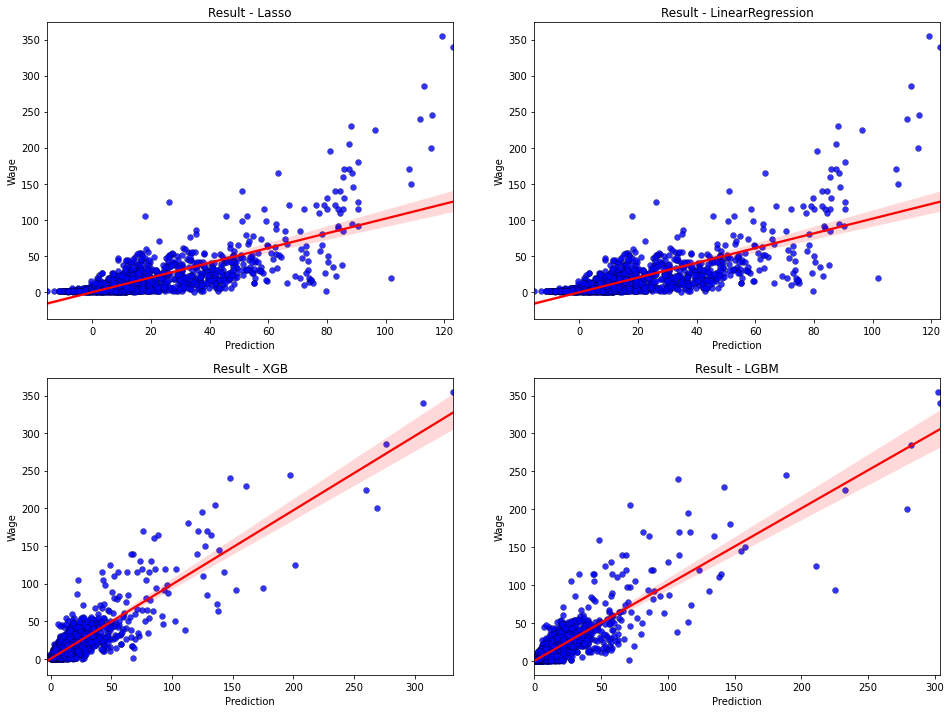

In [67]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
plt.subplots_adjust(hspace=0.2,wspace=0.2)

res = [pred1, pred2, pred3, pred4]
titles = ['Lasso', 'LinearRegression', 'XGB', 'LGBM']

r, c = 0, 0
for i in range(4):
    sns.regplot(res[i],y_test,scatter_kws={'color':'blue','linewidth':0.3,'edgecolor':'black'},line_kws={'color':'red'},ax=ax[r,c])
    ax[r,c].set_xlabel("Prediction")
    ax[r,c].set_ylabel("Wage")
    ax[r,c].set_title("Result - "+titles[i])
    if c == 1:
        c = 0
        r += 1
    else:c += 1
plt.show()

In [68]:
scores = {'Lasso':r2_score(y_test,pred1),'Linear':r2_score(y_test,pred2),'XGB':r2_score(y_test,pred3),'LGBM':r2_score(y_test,pred4),'RandomForest':r2_score(y_test,pred5)}
scores

{'Lasso': 0.585384365186535,
 'Linear': 0.5853722510247736,
 'XGB': 0.7913306467689012,
 'LGBM': 0.7748609670670876,
 'RandomForest': 0.7964555323409566}